<div dir="rtl">
    علیرضا رضایی
    <br>
    97100762
    <br>
    تمرین سری اول
    <br>
    سوال 2.2
    <br>
</div>

In [1]:
import numpy as np
from numpy import sin, cos, pi
import matplotlib.pyplot as plt
from seaborn import set as sset; sset()

In [2]:
# functions --------------------------------

def rotation_matrix_2d(theta):
    '''
        Parameters:
            theta -> radians
            
        Explanation:
            this function rotates points in the xy plane counterclockwise through an angle θ
        
        Usage:
            output is a numpy array matrix so you can use its inner dot method to do matrix product. (look at the next example)
            
            Example:
                v  = np.array([1, 0])
                rv = rotation_matrix(np.pi/2).dot(v)
                
                rv will be np.array([0, 1])
    '''
    
    M = np.array([
        [cos(theta), -sin(theta)],
        [sin(theta), cos(theta)]
    ])
    
    return M

def transfer_vector(x, y):
    return np.array([[x],
                     [y]])

In [3]:
class Fig:
    def __init__(self, points=np.array([[0, 0], [1, 0]]).T):
        '''
            temporary_points variable is used in the class functions to generate next steps points
        '''
        
        self.points = points
        self.temporary_points = np.array([])
        self.step = 0            
           
            
    def draw(self, points, new_fig=False, color="blue"):
        '''
            self.points is in the shape [
                                            [x0, x1, x2, x3],
                                            [y0, y1, y2, y3]
                                        ]
            self.points[0, :] means all points first axes (means Xs)
            self.points[1, :] means all points second axes (means Ys)
        '''
        
        if new_fig == True:
            new_fig = plt.figure()
            plt.title(f"step {self.step}")
            
        plt.xlim([-0.5, 1.5])
        plt.ylim([-0.5, 1.5])
        
        #we use + 0.3 to shift Ys to display better at the middle of the screen
        plt.plot(points[0, :], points[1, :] + 0.3, color=color)
    
    
    def scale(self, scale_factor):
        '''
            Parameters:
                scale_factor -> float
        '''
        
        return self.points * scale_factor
    
    
    def rotate(self, points, theta):
        '''
            Parameters:
                thetha -> radians
            
            Explanation:
                we get the first point [0, 0] as the origin and rotate all other points theta radians counterclockwise around it
                be careful that the first point have to be at the [0, 0] otherwise some math problems may happen
        '''
        
        return rotation_matrix_2d(theta).dot(points)
    
    
    def transfer(self, points, t_vector):
        '''
            Parameters:
                t_vector -> a transfer vector that is a np.array in the form [[x],
                                                                              [y]]
            Explanation:
                transfer all points in the direction and with the length of the transfer vector
        '''
        
        return points + t_vector
    
    
    def add_new_points_to_temporary_points(self, new_points):
        Xs = np.append(self.temporary_points[0, :], new_points[0, :])
        Ys = np.append(self.temporary_points[1, :], new_points[1, :])
        
        self.temporary_points = np.array([
                                            Xs,
                                            Ys
                                        ])    
       
    
    def f1(self):
        self.points = self.scale(np.sqrt(2)/2)
        rotated_points = self.rotate(self.points, pi/4)
        
        self.temporary_points = rotated_points
        
        self.draw(points=rotated_points, new_fig=True, color="blue")
        
    
    def f2(self):
        rotated_points = self.rotate(self.points, 3*pi/4)
        
        # we use flip method of numpy to reverse its order
        # number one is the Axis or axes along which to flip over
        flipped_rotated_points = np.flip(rotated_points, 1)
        
        # we want to draw rotated points from the origin that is the last point that we drew
        # so we have to calculate the transfer vector that transfer first point of the rotated points to that last point
        transfer_x = self.temporary_points[0, -1] - flipped_rotated_points[0, 0]
        transfer_y = self.temporary_points[1, -1] - flipped_rotated_points[1, 0]
        
        transfered_flipped_rotated_points = self.transfer(flipped_rotated_points, transfer_vector(transfer_x, transfer_y))
        
        self.add_new_points_to_temporary_points(transfered_flipped_rotated_points)
        
        self.draw(points=transfered_flipped_rotated_points, color="red")
        
        
    def generate(self, steps):
        '''
            Parameters:
                steps -> integer
                
            Explanation:
                this function will generate ad draw n steps. (n is the steps parameter of the function)
        '''
        
        for s in range(steps):
            self.step = s
            
            if self.step == 0:
                self.draw(points=self.points, new_fig=True)
                pass
        
            else:
                self.f1()
                self.f2()
                
                self.points = self.temporary_points

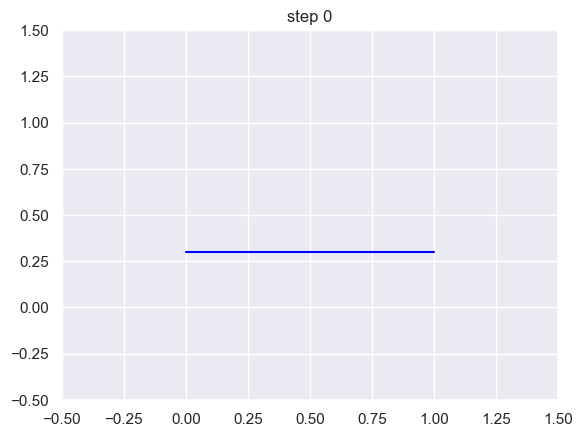

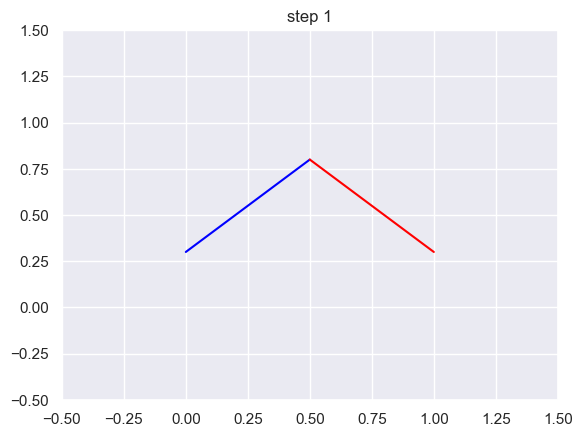

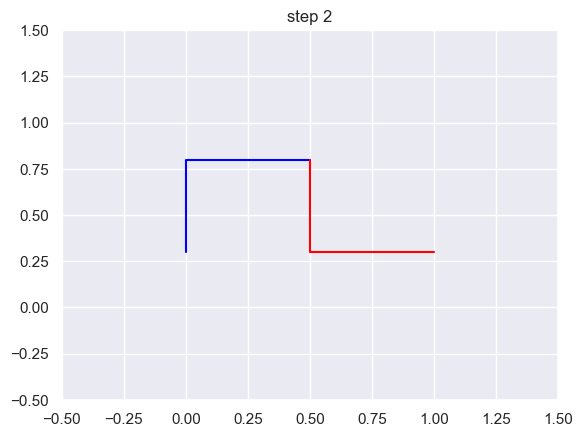

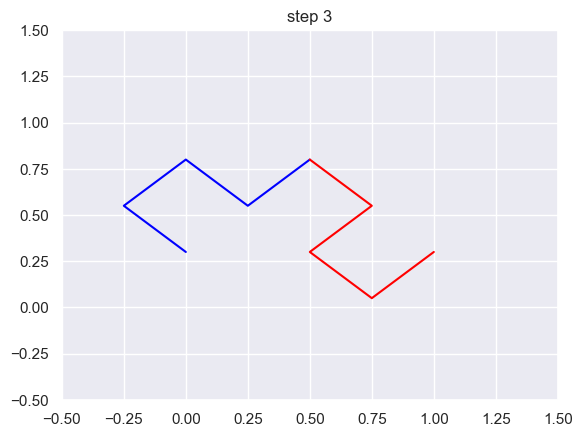

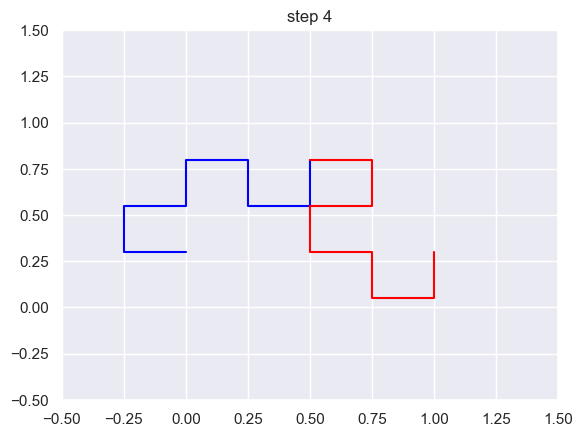

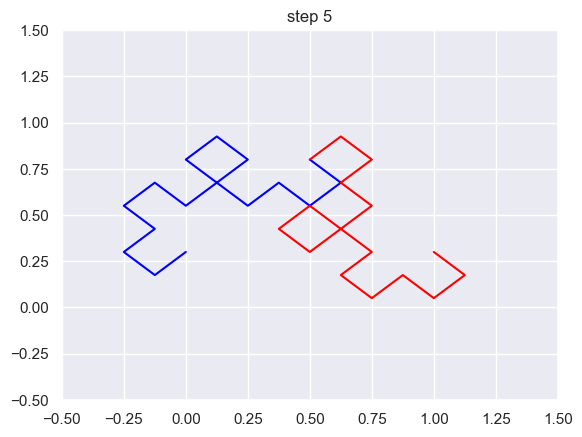

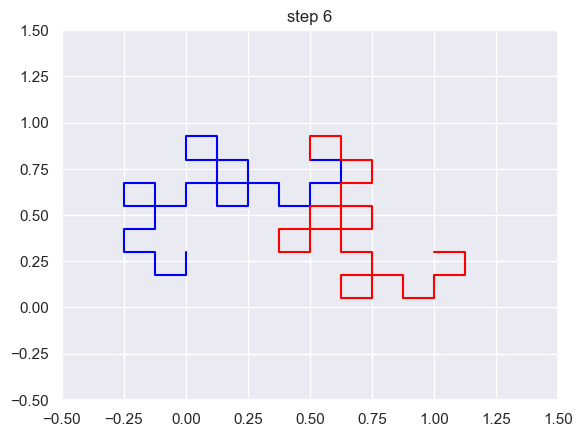

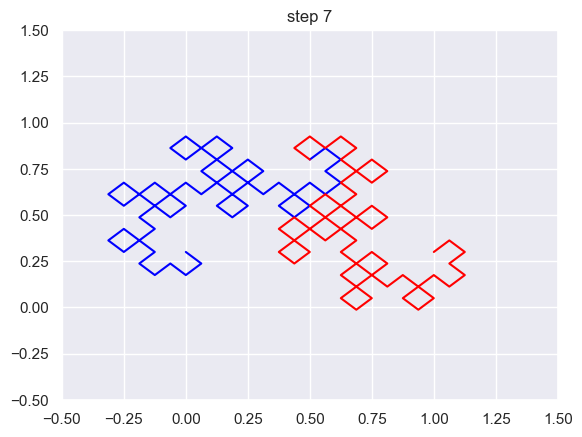

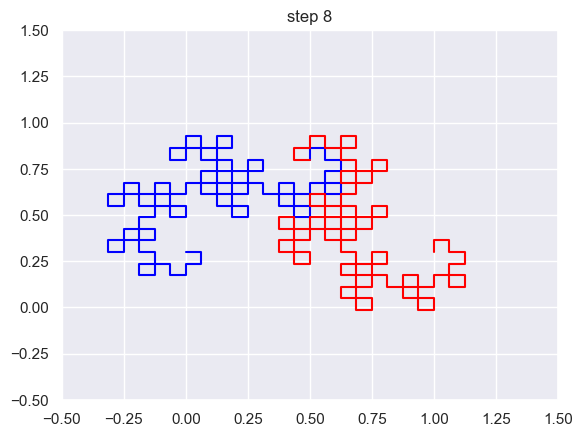

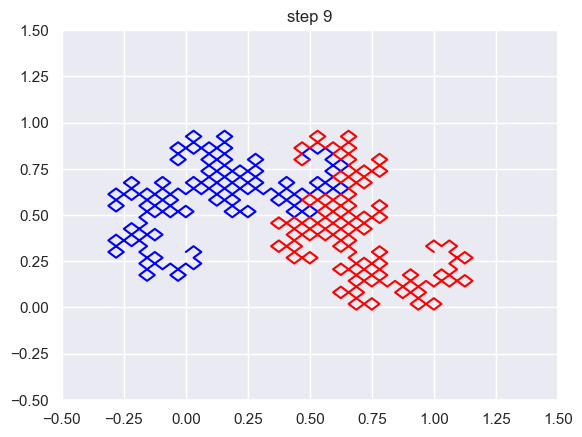

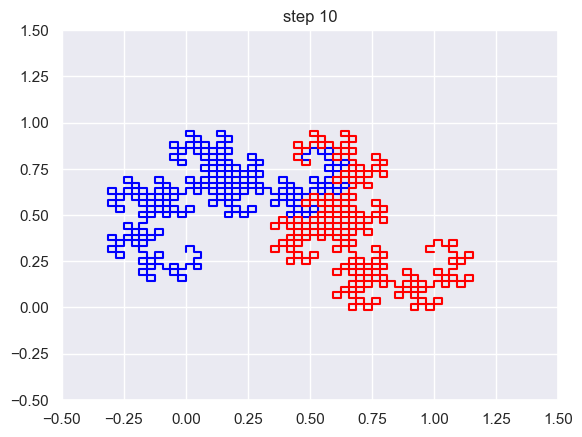

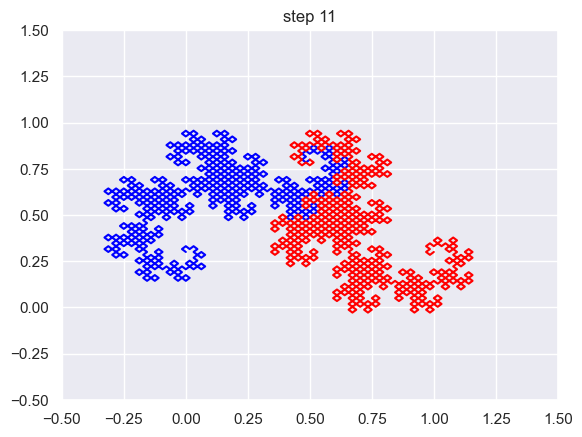

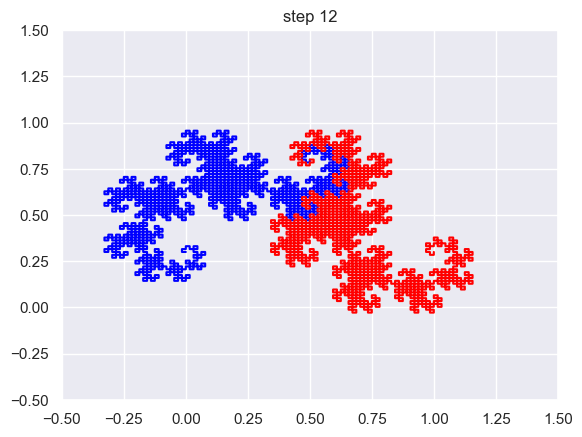

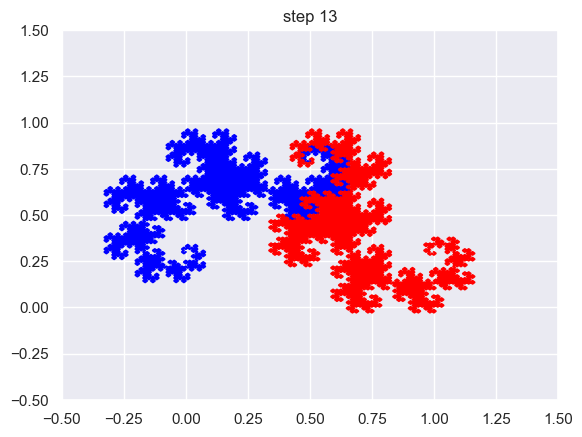

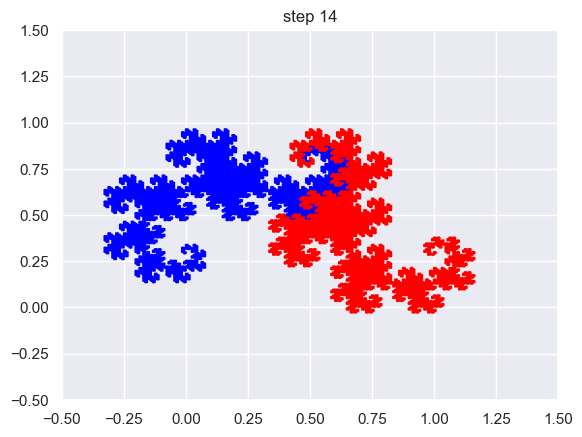

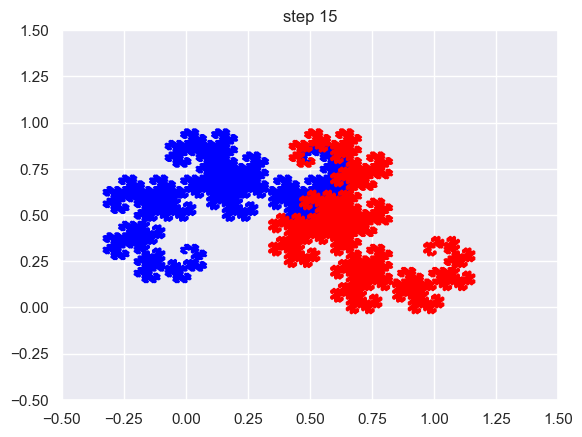

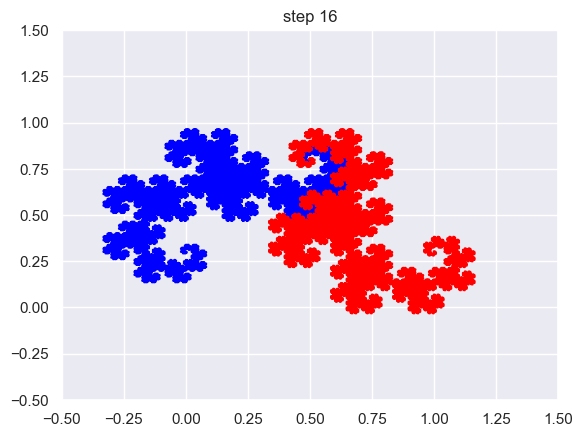

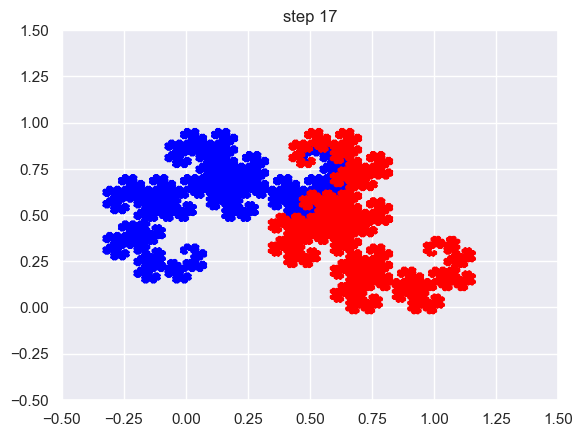

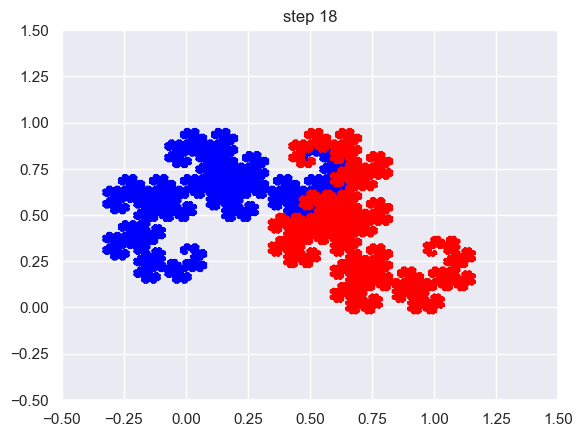

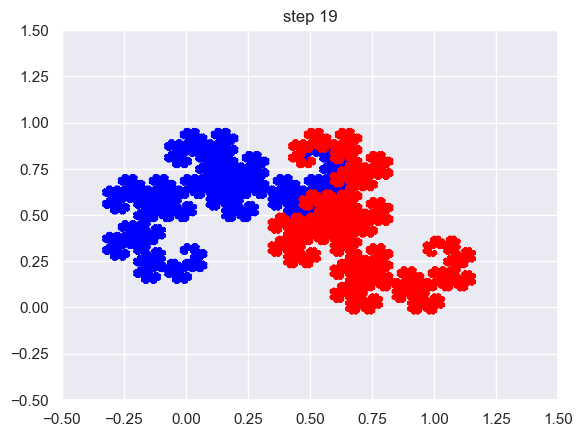

In [4]:
fig = Fig()

fig.generate(20)